# Introduction
Benchmark the performance of the `tree edit distance` computation with the APTED package.

## Notebook configuration
Configure several notebook configuration settings.

In [4]:
# Disable some warnings

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

# Use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

## Libraries / Packages
Import several useful packages for the notebook and configure some extra options.

In [26]:
# Miscellaneous libraries
import time
import random
import numpy as np
import pandas as pd
import networkx as nx

from tqdm.notebook import tqdm
from collections import defaultdict, Counter

# Setup some options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100


# Visualization
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

###

import sys
sys.path.append('..')

from src.utils.convert import getAdjacencyList
from src.models.dpatterns import computeEditDistance, computeRootedTrees

# Benchmark
---

In [33]:
results = []

# Number of runs per parameter combination to avg results
num_runs = 100
# Fixed depth
depth = 3
# Parameters for the graph generation
n = [1_000]
p = np.arange(0.001, 0.01, 0.001)

###
for n_i in n:
    for p_j in p:
        G = nx.erdos_renyi_graph(n=n_i, p=p_j)
        G = getAdjacencyList(G)
        t_compute_trees = 0
        t_compute_distance = 0
        for _ in tqdm(range(num_runs)):
            # Compute the rooted trees of the dataset
            t0 = time.time()
            rooted_trees = computeRootedTrees(G, depth=depth)
            t1 = time.time()
            # Select random two trees in the dataset
            T1 = rooted_trees[random.randint(0, n_i - 1)]
            T2 = rooted_trees[random.randint(0, n_i - 1)]
            # Compute the distance between them
            distance = computeEditDistance(T1, T2)
            t2 = time.time()
            # Store timings
            t_compute_trees += t1 - t0
            t_compute_distance += t2 - t1
        # Append the results
        results_i = {
            'n': n_i,
            'p': p_j,
            'avg_degree': n_i * p_j,
            't_compute_trees': t_compute_trees / num_runs,
            't_compute_distance': t_compute_distance / num_runs,
        }
        print(results_i)
        results.append(results_i)


results = pd.DataFrame(results)
results

  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.001, 'avg_degree': 1.0, 't_compute_trees': 0.01930734157562256, 't_compute_distance': 0.0014400553703308105}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.002, 'avg_degree': 2.0, 't_compute_trees': 0.04323899507522583, 't_compute_distance': 0.015876760482788087}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.003, 'avg_degree': 3.0, 't_compute_trees': 0.086741623878479, 't_compute_distance': 0.12925693273544311}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.004, 'avg_degree': 4.0, 't_compute_trees': 0.13195582389831542, 't_compute_distance': 0.34274343729019163}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.005, 'avg_degree': 5.0, 't_compute_trees': 0.20074129343032837, 't_compute_distance': 1.2141845798492432}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.006, 'avg_degree': 6.0, 't_compute_trees': 0.292197539806366, 't_compute_distance': 3.8686818790435793}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.007, 'avg_degree': 7.0, 't_compute_trees': 0.3700044274330139, 't_compute_distance': 5.939655733108521}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.008, 'avg_degree': 8.0, 't_compute_trees': 0.5061180210113525, 't_compute_distance': 13.916362679004669}


  0%|          | 0/100 [00:00<?, ?it/s]

{'n': 1000, 'p': 0.009000000000000001, 'avg_degree': 9.000000000000002, 't_compute_trees': 0.737015643119812, 't_compute_distance': 36.342988781929016}


,n,p,avg_degree,t_compute_trees,t_compute_distance
0,1000,0.001,1.0,0.019307,0.001440
1,1000,0.002,2.0,0.043239,0.015877
2,1000,0.003,3.0,0.086742,0.129257
3,1000,0.004,4.0,0.131956,0.342743
4,1000,0.005,5.0,0.200741,1.214185
5,1000,0.006,6.0,0.292198,3.868682
6,1000,0.007,7.0,0.370004,5.939656
7,1000,0.008,8.0,0.506118,13.916363
8,1000,0.009,9.0,0.737016,36.342989


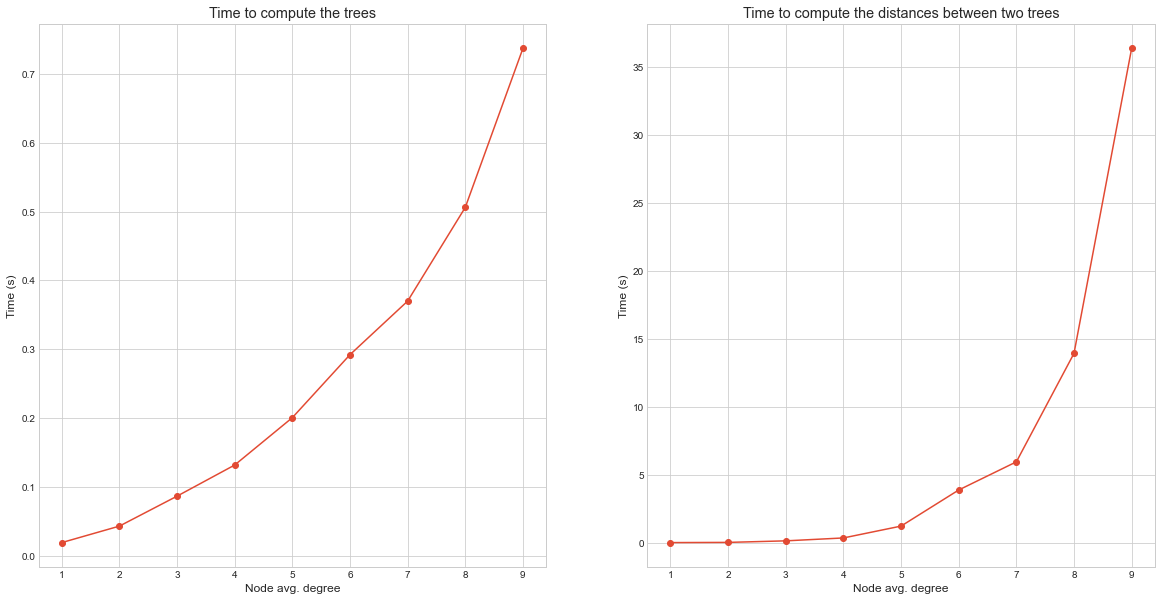

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)

ax1.plot(results['avg_degree'], results['t_compute_trees'], marker='o')
ax1.set_title('Time to compute the trees')
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Node avg. degree')

ax2.plot(results['avg_degree'], results['t_compute_distance'], marker='o')
ax2.set_title('Time to compute the distances between two trees')
ax2.set_ylabel('Time (s)')
ax2.set_xlabel('Node avg. degree')

plt.show()